In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV

In [2]:
data = pd.read_csv("diabetes_data.csv")

In [3]:
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [5]:
data.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [6]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

In [7]:
data.drop_duplicates()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [8]:
variabel_numerik = data.columns.difference(['BMI', 'MentHlth', 'PhysHlth'])
data[variabel_numerik] = data[variabel_numerik].astype('category')
data[variabel_numerik] = data[variabel_numerik].apply(lambda x: x.cat.codes)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,7.584055,2.852153,0.0,6.0,8.0,10.0,12.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


In [10]:
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,3,1,0,1,26.0,0,0,1,0,1,0,2,5.0,30.0,0,0,1,0
1,11,1,1,1,26.0,1,0,0,1,0,0,2,0.0,0.0,0,1,1,0
2,12,1,0,1,26.0,0,0,1,1,1,0,0,0.0,10.0,0,0,0,0
3,10,1,1,1,28.0,1,0,1,1,1,0,2,0.0,3.0,0,0,1,0
4,7,0,0,1,29.0,1,0,1,1,1,0,1,0.0,0.0,0,0,0,0


In [11]:
data['Diabetes'].value_counts()

Diabetes
0    35346
1    35346
Name: count, dtype: int64

In [12]:
X = data.drop(["Diabetes"], axis = 1)
y = data["Diabetes"]

In [13]:
# Calculate information gain
ig = mutual_info_classif(X, y)

# Create dictionary to store information gain values
ig_dict = {}
for i in range(len(X.columns)):
    ig_dict[X.columns[i]] = ig[i]

# Sort features by information gain in descending order
ig_dict_sorted = dict(sorted(ig_dict.items(), key=lambda item: item[1], reverse=True))

# Select the top n features
n = 8
selected_features = list(ig_dict_sorted.keys())[:n]

X_infgain = X[selected_features]

print('Selected Features:')
print(selected_features)


Selected Features:
['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'PhysHlth', 'HeartDiseaseorAttack']


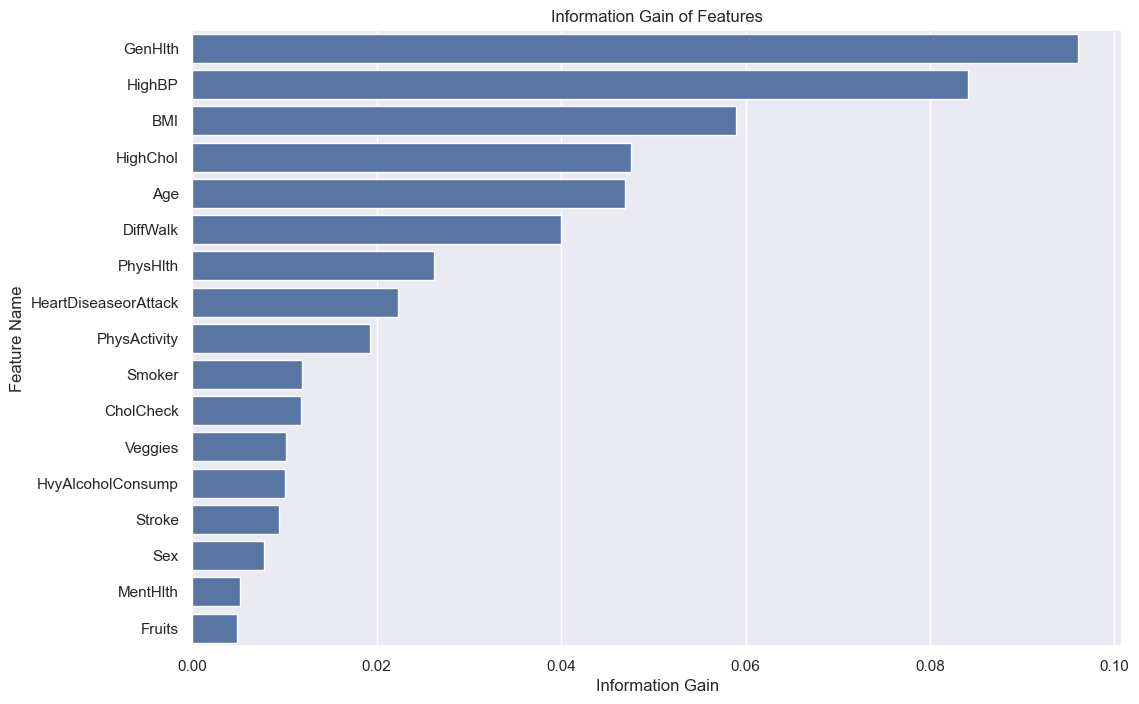

In [14]:
# Visualize the information gain of each feature
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=list(ig_dict_sorted.values()), y=list(ig_dict_sorted.keys()))
plt.title('Information Gain of Features')
plt.xlabel('Information Gain')
plt.ylabel('Feature Name')
plt.show()

In [15]:
estimator = LogisticRegression(random_state=42)
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=42, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=LogisticRegression(random_state=42), scoring='accuracy')

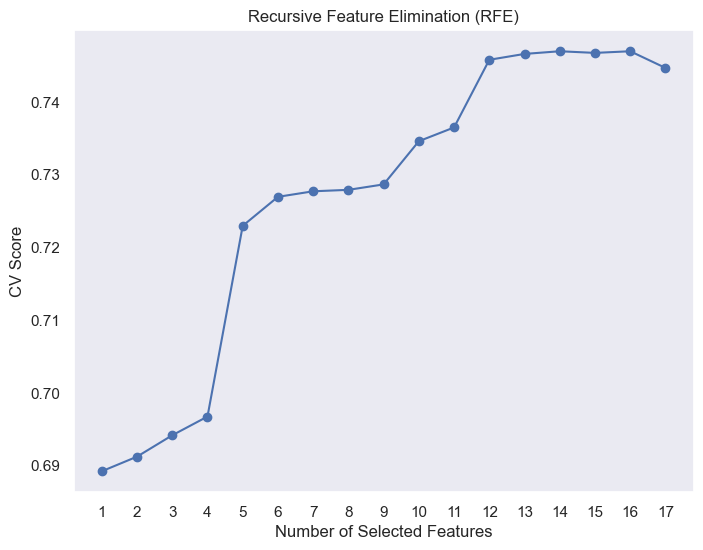

The optimal number of features: 16


In [16]:
# Plotting the Recursive Feature Elimination (RFE) cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.grid()
plt.xticks(range(1, X.shape[1] + 1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

# Display the optimal number of features
print("The optimal number of features: {}".format(rfecv.n_features_))

In [17]:
X_rfe = X.iloc[:, rfecv.support_]

In [18]:
X_rfe.head()

,Age,Sex,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
0,3,1,0,1,26.0,0,1,0,1,0,2,5.0,30.0,0,0,1
1,11,1,1,1,26.0,0,0,1,0,0,2,0.0,0.0,0,1,1
2,12,1,0,1,26.0,0,1,1,1,0,0,0.0,10.0,0,0,0
3,10,1,1,1,28.0,0,1,1,1,0,2,0.0,3.0,0,0,1
4,7,0,0,1,29.0,0,1,1,1,0,1,0.0,0.0,0,0,0


In [19]:
data['Diabetes'].value_counts()

Diabetes
0    35346
1    35346
Name: count, dtype: int64

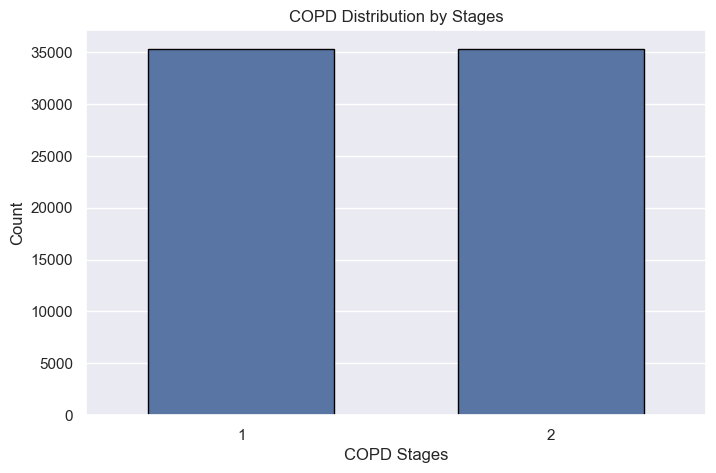

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Diabetes", data=data, width=0.6, edgecolor="black")  
plt.xticks([0, 1], labels=[1, 2])       
plt.xlabel("COPD Stages")
plt.ylabel("Count")
plt.title("COPD Distribution by Stages")
plt.show()

In [22]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_infgain, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
y_train.value_counts()

Diabetes
1    28277
0    28276
Name: count, dtype: int64

In [24]:
# Initialize the XGBoost classifier
xg = XGBClassifier(n_estimators=350)

# Fit the model
xg.fit(X_train, y_train)

# Make predictions
xg_preds = xg.predict(X_test)

# Print classification report
print(classification_report(y_test, xg_preds))


              precision    recall  f1-score   support

           0       0.75      0.70      0.73      7070
           1       0.72      0.77      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [25]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Initialize the LightGBM classifier
lgbm = LGBMClassifier(n_estimators=350, random_state=42)

# Fit the model
lgbm.fit(X_train, y_train)

# Make predictions
lgbm_preds = lgbm.predict(X_test)

# Print classification report
print("LightGBM Classification Report:")
print(classification_report(y_test, lgbm_preds))

[LightGBM] [Info] Number of positive: 28277, number of negative: 28276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 56553, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000035
[LightGBM] [Info] Start training from score 0.000035
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7070
           1       0.72      0.79      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # A simple base estimator for AdaBoost
from sklearn.metrics import classification_report

# Initialize the AdaBoost classifier with a decision tree as the base estimator
ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),  # A weak classifier, can be adjusted
    n_estimators=350,
    random_state=42
)

# Fit the model
ada.fit(X_train, y_train)

# Make predictions
ada_preds = ada.predict(X_test)

# Print classification report
print("AdaBoost Classification Report:")
print(classification_report(y_test, ada_preds))


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      7070
           1       0.73      0.77      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize the GradientBoostingClassifier with the specified parameters
gb = GradientBoostingClassifier(
    n_estimators=20,  # Number of boosting stages (trees)
    learning_rate=0.5,  # Step size shrinking to prevent overfitting
    max_features=2,  # Maximum number of features to consider for each tree
    max_depth=2,  # Maximum depth of individual trees
    random_state=0  # For reproducibility
)

# Fit the model with the training data
gb.fit(X_train, y_train)

# Make predictions on the validation/test data
predictions = gb.predict(X_test)

# Print the classification report to evaluate the performance
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, predictions))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      7070
           1       0.74      0.77      0.75      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluasi model dan tampilkan classification report
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return model

def train_xgboost(X_train, X_test, y_train, y_test):
    """
    XGBoost dengan parameter yang dioptimasi
    """
    xgb_model = XGBClassifier(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=7,
        min_child_weight=1,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=1,
        tree_method='hist',
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1
    )
    return evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

def train_gradient_boosting(X_train, X_test, y_train, y_test):
    """
    Gradient Boosting dengan parameter yang dioptimasi
    """
    gb_model = GradientBoostingClassifier(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=7,
        min_samples_split=5,
        min_samples_leaf=3,
        subsample=0.8,
        max_features='sqrt',
        random_state=42
    )
    return evaluate_model(gb_model, X_train, X_test, y_train, y_test)

def train_bagging(X_train, X_test, y_train, y_test):
    """
    Bagging dengan XGBoost sebagai base estimator
    """
    base_estimator = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    
    bag_model = BaggingClassifier(
        base_estimator=base_estimator,
        n_estimators=10,
        max_samples=0.8,
        max_features=0.8,
        random_state=42,
        n_jobs=-1
    )
    return evaluate_model(bag_model, X_train, X_test, y_train, y_test)

def train_ensemble(X_train, X_test, y_train, y_test):
    """
    Voting Ensemble dari ketiga model
    """
    # Define base models
    xgb = XGBClassifier(
        n_estimators=500,
        learning_rate=0.01,
        max_depth=7,
        random_state=42
    )
    
    gb = GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.01,
        max_depth=7,
        random_state=42
    )
    
    bag = BaggingClassifier(
        base_estimator=XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5
        ),
        n_estimators=10,
        random_state=42
    )
    
    # Create voting classifier
    ensemble = VotingClassifier(
        estimators=[
            ('xgb', xgb),
            ('gb', gb),
            ('bag', bag)
        ],
        voting='soft'
    )
    
    return evaluate_model(ensemble, X_train, X_test, y_train, y_test)

def preprocess_data(X_train, X_test):
    """
    Preprocessing data menggunakan StandardScaler
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def improve_model(X_train, X_test, y_train, y_test):
    """
    Pipeline utama untuk training dan evaluasi model
    """
    # 1. Preprocess data
    print("Preprocessing data...")
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)
    
    # 2. Train XGBoost
    print("\nTraining XGBoost...")
    xgb_model = train_xgboost(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # 3. Train Gradient Boosting
    print("\nTraining Gradient Boosting...")
    gb_model = train_gradient_boosting(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # 4. Train Bagging
    print("\nTraining Bagging...")
    bag_model = train_bagging(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # 5. Train Ensemble
    print("\nTraining Ensemble Model...")
    ensemble_model = train_ensemble(X_train_scaled, X_test_scaled, y_train, y_test)
    
    return xgb_model, gb_model, bag_model, ensemble_model

def tune_models(X_train, y_train):
    """
    Hyperparameter tuning untuk semua model
    """
    # XGBoost parameters
    xgb_params = {
        'n_estimators': [100, 500, 1000],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2]
    }
    
    # Gradient Boosting parameters
    gb_params = {
        'n_estimators': [100, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 9],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.6, 0.8, 1.0],
        'max_features': ['sqrt', 'log2', None]
    }
    
    # Tuning XGBoost
    print("Tuning XGBoost...")
    xgb = XGBClassifier(random_state=42)
    xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=20, cv=5, 
                                  scoring='accuracy', random_state=42, n_jobs=-1)
    xgb_search.fit(X_train, y_train)
    
    # Tuning Gradient Boosting
    print("Tuning Gradient Boosting...")
    gb = GradientBoostingClassifier(random_state=42)
    gb_search = RandomizedSearchCV(gb, gb_params, n_iter=20, cv=5, 
                                 scoring='accuracy', random_state=42, n_jobs=-1)
    gb_search.fit(X_train, y_train)
    
    print("XGBoost best parameters:", xgb_search.best_params_)
    print("XGBoost best score:", xgb_search.best_score_)
    print("\nGradient Boosting best parameters:", gb_search.best_params_)
    print("Gradient Boosting best score:", gb_search.best_score_)
    
    return xgb_search.best_estimator_, gb_search.best_estimator_

# Example usage
if __name__ == "__main__":
    # Assume X_train, X_test, y_train, y_test are your data
    
    # Option 1: Quick training with default parameters
    models = improve_model(X_train, X_test, y_train, y_test)
    
    # Option 2: Training with hyperparameter tuning
    # First tune the models
    best_xgb, best_gb = tune_models(X_train, y_train)
    
    # Then use the best models in your ensemble

Preprocessing data...

Training XGBoost...
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7070
           1       0.73      0.79      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139


Training Gradient Boosting...
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7070
           1       0.73      0.79      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139


Training Bagging...


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.70      0.74      7070
           1       0.73      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Training Ensemble Model...


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7070
           1       0.72      0.79      0.76      7069

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139

Tuning XGBoost...
Tuning Gradient Boosting...
XGBoost best parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}
XGBoost best score: 0.7485897275650308

Gradient Boosting best parameters: {'subsample': 0.6, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.05}
Gradient Boosting best score: 0.7480592501638234


In [ ]:
from bayes_opt import BayesianOptimization
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score, make_scorer
from sklearn.model_selection import cross_val_score

# Define the function to optimize
def xgb_cv(n_estimators, learning_rate, max_depth, min_child_weight, gamma, subsample, colsample_bytree):
    # Define the model with the current parameters
    model = XGBClassifier(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        min_child_weight=int(min_child_weight),
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )
    
    # Perform cross-validation and calculate recall (macro average) as the score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(recall_score, average='macro'))
    return cv_scores.mean()

# Define the parameter space for Bayesian Optimization
param_bounds = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.3),
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'gamma': (0, 0.5),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Initialize the Bayesian Optimizer
optimizer = BayesianOptimization(
    f=xgb_cv,         # Function to optimize
    pbounds=param_bounds,  # Parameter bounds
    random_state=42,
    verbose=2
)

# Run the optimization
optimizer.maximize(init_points=10, n_iter=100)

# Extract the best parameters
best_params = optimizer.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])

print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_xgb = XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions and evaluate
best_xgb_preds = best_xgb.predict(X_test)
print(classification_report(y_test, best_xgb_preds))

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.7344    | 0.7498    | 0.4754    | 0.2223    | 7.191     | 2.404     | 162.4     | 0.6232    |
| 2         | 0.7374    | 0.9465    | 0.3006    | 0.2153    | 3.144     | 9.729     | 433.0     | 0.6849    |
| 3         | 0.7367    | 0.6727    | 0.0917    | 0.09823   | 6.673     | 4.888     | 216.5     | 0.8447    |
| 4         | 0.7371    | 0.6558    | 0.1461    | 0.1162    | 6.192     | 8.067     | 179.9     | 0.8057    |
| 5         | 0.7361    | 0.837     | 0.02323   | 0.1862    | 4.194     | 1.585     | 479.6     | 0.9863    |
| 6         | 0.7374    | 0.9234    | 0.1523    | 0.03832   | 7.79      | 4.961     | 148.8     | 0.7981    |
| 7         | 0.7366    | 0.6138    | 0.4547    | 0.08505   | 7.638     | 3.805     | 308.0     | 0.8187    |
| 8       

In [ ]:
X_infgain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   GenHlth               70692 non-null  category
 1   HighBP                70692 non-null  category
 2   BMI                   70692 non-null  float64 
 3   HighChol              70692 non-null  category
 4   Age                   70692 non-null  category
 5   DiffWalk              70692 non-null  category
 6   HeartDiseaseorAttack  70692 non-null  category
 7   PhysHlth              70692 non-null  float64 
dtypes: category(6), float64(2)
memory usage: 1.5 MB


In [ ]:
# 1. Enhanced XGBoost with Additional Parameters
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import numpy as np

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return model

# 1. Enhanced XGBoost with better parameters
def train_enhanced_xgboost(X_train, X_test, y_train, y_test):
    xgb_model = XGBClassifier(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=7,
        min_child_weight=1,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=1,
        tree_method='hist',  # Faster training
        reg_alpha=0.1,       # L1 regularization
        reg_lambda=1.0,      # L2 regularization
        random_state=42
    )
    return evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

# 2. LightGBM Implementation
def train_lightgbm(X_train, X_test, y_train, y_test):
    lgb_model = LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.01,
        num_leaves=31,
        feature_fraction=0.8,
        bagging_fraction=0.8,
        bagging_freq=5,
        random_state=42
    )
    return evaluate_model(lgb_model, X_train, X_test, y_train, y_test)

# 3. Ensemble Method (Voting Classifier)
def train_ensemble(X_train, X_test, y_train, y_test):
    # Define base models
    xgb = XGBClassifier(
        n_estimators=500,
        learning_rate=0.01,
        max_depth=7,
        random_state=42
    )
    
    lgb = LGBMClassifier(
        n_estimators=500,
        learning_rate=0.01,
        num_leaves=31,
        random_state=42
    )
    
    rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=7,
        random_state=42
    )
    
    # Create voting classifier
    ensemble = VotingClassifier(
        estimators=[
            ('xgb', xgb),
            ('lgb', lgb),
            ('rf', rf)
        ],
        voting='soft'
    )
    
    return evaluate_model(ensemble, X_train, X_test, y_train, y_test)

# 4. Feature Engineering and Preprocessing
def preprocess_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Main execution
def improve_model(X_train, X_test, y_train, y_test):
    # 1. Preprocess the data
    print("Preprocessing data...")
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)
    
    # 2. Try Enhanced XGBoost
    print("\nTraining Enhanced XGBoost...")
    xgb_model = train_enhanced_xgboost(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # 3. Try LightGBM
    print("\nTraining LightGBM...")
    lgb_model = train_lightgbm(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # 4. Try Ensemble
    print("\nTraining Ensemble Model...")
    ensemble_model = train_ensemble(X_train_scaled, X_test_scaled, y_train, y_test)
    
    return xgb_model, lgb_model, ensemble_model

# Optional: Hyperparameter Tuning with RandomizedSearchCV
def tune_xgboost(X_train, X_test, y_train, y_test):
    param_dist = {
        'n_estimators': [100, 500, 1000],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2]
    }
    
    xgb = XGBClassifier(random_state=42)
    random_search = RandomizedSearchCV(
        xgb, param_distributions=param_dist,
        n_iter=20, cv=5, scoring='accuracy',
        random_state=42, n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)
    print("Best parameters found:", random_search.best_params_)
    print("Best score:", random_search.best_score_)
    
    return random_search.best_estimator_

In [ ]:
# Jalankan semua model
xgb_model, lgb_model, ensemble_model = improve_model(X_train, X_test, y_train, y_test)

# Atau tune XGBoost secara spesifik
best_xgb = tune_xgboost(X_train, X_test, y_train, y_test)

Preprocessing data...

Training Enhanced XGBoost...
              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72      7090
         1.0       0.71      0.80      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139


Training LightGBM...
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return model

# 1. Enhanced XGBoost with better parameters
def train_enhanced_xgboost(X_train, X_test, y_train, y_test):
    xgb_model = XGBClassifier(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=7,
        min_child_weight=1,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=1,
        tree_method='hist',  # Faster training
        reg_alpha=0.1,       # L1 regularization
        reg_lambda=1.0,      # L2 regularization
        random_state=42
    )
    return evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

# 2. LightGBM Implementation
def train_lightgbm(X_train, X_test, y_train, y_test):
    lgb_model = LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.01,
        num_leaves=31,
        feature_fraction=0.8,
        bagging_fraction=0.8,
        bagging_freq=5,
        random_state=42
    )
    return evaluate_model(lgb_model, X_train, X_test, y_train, y_test)

# 3. Ensemble Method (Voting Classifier)
def train_ensemble(X_train, X_test, y_train, y_test):
    # Define base models
    xgb = XGBClassifier(
        n_estimators=500,
        learning_rate=0.01,
        max_depth=7,
        random_state=42
    )
    
    lgb = LGBMClassifier(
        n_estimators=500,
        learning_rate=0.01,
        num_leaves=31,
        random_state=42
    )
    
    rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=7,
        random_state=42
    )
    
    # Create voting classifier
    ensemble = VotingClassifier(
        estimators=[('xgb', xgb), ('lgb', lgb), ('rf', rf)],
        voting='soft'
    )
    
    return evaluate_model(ensemble, X_train, X_test, y_train, y_test)

# 4. Feature Engineering and Preprocessing - Apply StandardScaler only to numeric columns
def preprocess_data(X_train, X_test):
    # Identify numeric and categorical columns
    numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X_train.select_dtypes(include=['category', 'object']).columns
    
    # Create transformers for both numeric and categorical columns
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
        ('scaler', StandardScaler())  # Standardize numeric columns
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
    ])
    
    # Combine both transformers into a single ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )
    
    # Apply transformations to both the train and test sets
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    return X_train_processed, X_test_processed

# Main execution
def improve_model(X_train, X_test, y_train, y_test):
    # 1. Preprocess the data
    print("Preprocessing data...")
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)
    
    # 2. Try Enhanced XGBoost
    print("\nTraining Enhanced XGBoost...")
    xgb_model = train_enhanced_xgboost(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # 3. Try LightGBM
    print("\nTraining LightGBM...")
    lgb_model = train_lightgbm(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # 4. Try Ensemble
    print("\nTraining Ensemble Model...")
    ensemble_model = train_ensemble(X_train_scaled, X_test_scaled, y_train, y_test)
    
    return xgb_model, lgb_model, ensemble_model

# Optional: Hyperparameter Tuning with RandomizedSearchCV
def tune_xgboost(X_train, X_test, y_train, y_test):
    param_dist = {
        'n_estimators': [100, 500, 1000],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2]
    }
    
    xgb = XGBClassifier(random_state=42)
    random_search = RandomizedSearchCV(
        xgb, param_distributions=param_dist,
        n_iter=20, cv=5, scoring='accuracy',
        random_state=42, n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)
    print("Best parameters found:", random_search.best_params_)
    print("Best score:", random_search.best_score_)
    
    return random_search.best_estimator_


In [ ]:
# Jalankan semua model
xgb_model, lgb_model, ensemble_model = improve_model(X_train, X_test, y_train, y_test)

# Atau tune XGBoost secara spesifik
best_xgb = tune_xgboost(X_train, X_test, y_train, y_test)

Preprocessing data...

Training Enhanced XGBoost...
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Training LightGBM...
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py", line 1500, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py", line 521, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py", line 958, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 1529, in __init__
    self._init(
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 1588, in _init
    it.reraise()
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 576, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 557, in _handle_exception
    return fn()
           ^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py", line 1280, in next
    input_data(**self.kwargs)
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 624, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py", line 1315, in _proxy_transform
    arr, feature_names, feature_types = _transform_pandas_df(
                                        ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py", line 490, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py", line 308, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:GenHlth: category, HighBP: category, HighChol: category, Age: category, DiffWalk: category, HeartDiseaseorAttack: category


## Tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# define the model
clf= TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       scheduler_params={"step_size":10, 
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                      )

# fit the model 
clf.fit(
    X_train,y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'test'],
    eval_metric=['auc','balanced_accuracy'],
    max_epochs=200, patience=60,
    batch_size=512, virtual_batch_size=512,
    num_workers=0,
    weights=1,
    drop_last=False
)            

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


TypeError: Pandas DataFrame are not supported: apply X.values when calling fit